In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.data.csv


In [23]:
data=pd.read_csv("../input/iris-dataset/iris.data.csv")

In [24]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [25]:
data.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [26]:
data.shape

(149, 5)

In [27]:
y=data['Iris-setosa']
data=data.drop('Iris-setosa',axis=1)
X=data

In [28]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit_transform(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier(n_neighbors=5)
k.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred1=k.predict(X_test)

In [32]:
k.score(X_test,y_test)

0.9565217391304348

Text(33.0, 0.5, 'Actual Label')

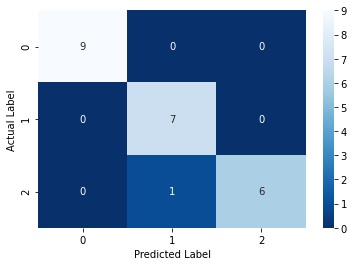

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,cmap="Blues_r")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
X_scaled=scale(X_train)
logi=LogisticRegression()
logi.fit(X_scaled,y_train)


LogisticRegression()

In [37]:
X_test2=scale(X_test)
y_pred2=logi.predict(X_test2)

In [38]:
logi.score(X_test2,y_test)

0.8695652173913043

In [ ]:
from sklearn.metrics import accuracy_score
print("KNN: ",accuracy_score(y_test,y_pred1))
print("LOGISTIC REGRESSION: ",accuracy_score(y_test,y_pred2))